聚类算法
===

# 1.概述
## 1.1.聚类算法概述
- 层次聚类法：唯一分类
- KMeans算法：唯一分类
- 密度聚类法：唯一分类
- 普聚类：唯一分类
- GMM：混合高斯模型，分类后，还可以返回分到这个类的概率
- LDA

## 1.2.聚类的定义
聚类就是对大量未知标注的数据集，按数据的内在相似性将数据集划分为多个类别，使类别内的数据相似性较大而类别间的数据相似度较小

## 1.3.相似度/距离计算方法总结
- 闵可夫斯基距离Minkowski距离，参见KNN算法
- 杰拉德相似系数(Jaccard)：$J(A,B)=\frac{|A\cap B|}{|A\cup B|}$
- 余弦相似度(consine similarity):$cos(\theta)=\frac{\alpha^Tb}{|\alpha| \bullet |b|}$
- Pearson相似系数:$\rho_{XY}=\frac{cov(X,Y)}{\sigma_X\sigma_Y}=\frac{E[(X-\mu_X)(Y-\mu_Y)]}{\sigma_X\sigma_Y}=\frac{\sum_{i=1}^n(X_i-\mu_X)(Y_i-\mu_Y)}{\sqrt{\sum_{i=1}^n(X_i-\mu_X)^2}\sqrt{\sum_{i=1}^n(Y_i-\mu_Y)^2}}$
- 相对熵(K-L距离):$D(p||q)=\sum_xp(x)log\frac{p)(x)}{q(x)}=E_{p(x)}log\frac{p(x)}{q(x)}$
- Hellinger距离:$D_{\alpha}(p||q)=\frac{2}{1-\alpha^2}[1-\int p(x)^{\frac{1+\alpha}{2}}q(x)^{\frac{1-\alpha}{2}}dx]$

## 1.4.聚类的衡量指标
- 均一性：一个簇只包含一个类别的样本，则满足均一性
$$h=\begin{cases}
1 & H(C)=0\\\\
1-\frac{H(C|K)}{H(C)} & otherwise
\end{cases}$$
- 完整性：同样类别的样本被归类到相同的簇中，则满足完整性
$$c=\begin{cases}
1 & H(K)=0\\\\
1-\frac{H(K|C)}{H(K)} & otherwise
\end{cases}$$
- V-measure：均一性和完整性的加权平均
$$\nu_{\beta}=\frac{(1+\beta) \bullet h \bullet c}{\beta \bullet h + c}$$

# 2.层次聚类
层次聚类方法对给定的数据集进行层次的分解，知道某种条件满足为止，具体又分为

## 2.1.凝聚的层次聚类
AGNES算法(AGglomerative NESting)，一种自底向上的策略，首先将每个对象作为一个簇,然后合并这些原子簇为越来越大的簇，知道某个终结条件被满足。最初将每个对象作为一个簇，然后这些簇根据某些准则被一步步地合并。两个簇间的距离由这两个不同簇中距离最近的数据点对的相似度来确定；聚类的合并过程反复进行知道所有的对象最终满足簇的数目.可以通过最小距离、最大距离和平均距离来定义两个簇$A_i,A_j$的相似度或距离
- 最小距离：两个集合中最近的两个样本的距离，容易形成链状结构
- 最大距离：两个集合中最严的两个样本的距离，若存在异常值则不稳定
- 平均距离：两个集合中样本间两两距离的平均值，两个集合中样本间两两距离的平方和ward

## 2.2.分裂的层次聚类
DIANA算法(Divisive ANAlysis)，采用自顶向下的策略，它首先将所有对象至于一个簇中，然后逐渐细分为越来越小的簇，直到达到了某个终结条件。首先将所有的对象初始化到一个簇中，然后根据一些原则(比如最大的欧氏距离)，将该簇分类。知道到达用户指定的簇数目或者两个簇之间的距离超过了某个阀值

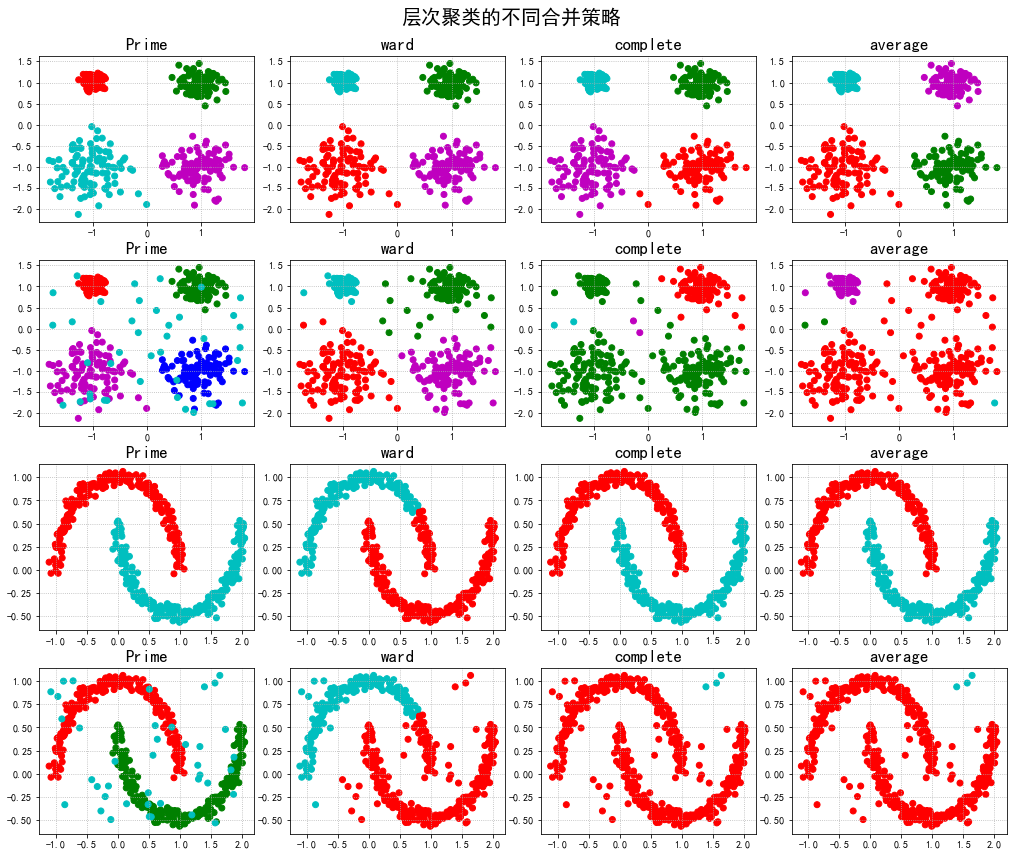

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
import sklearn.datasets as ds
import warnings
%matplotlib inline
def extend(a, b):
    return 1.05*a-0.05*b, 1.05*b-0.05*a

warnings.filterwarnings(action='ignore', category=UserWarning)
np.set_printoptions(suppress=True)
np.random.seed(0)
n_clusters = 4
N = 400
data1, y1 = ds.make_blobs(n_samples=N, n_features=2, centers=((-1, 1), (1, 1), (1, -1), (-1, -1)),
                          cluster_std=(0.1, 0.2, 0.3, 0.4), random_state=0)
data1 = np.array(data1)
n_noise = int(0.1*N)
r = np.random.rand(n_noise, 2)
data_min1, data_min2 = np.min(data1, axis=0)
data_max1, data_max2 = np.max(data1, axis=0)
r[:, 0] = r[:, 0] * (data_max1-data_min1) + data_min1
r[:, 1] = r[:, 1] * (data_max2-data_min2) + data_min2
data1_noise = np.concatenate((data1, r), axis=0)
y1_noise = np.concatenate((y1, [4]*n_noise))

data2, y2 = ds.make_moons(n_samples=N, noise=.05)
data2 = np.array(data2)
n_noise = int(0.1 * N)
r = np.random.rand(n_noise, 2)
data_min1, data_min2 = np.min(data2, axis=0)
data_max1, data_max2 = np.max(data2, axis=0)
r[:, 0] = r[:, 0] * (data_max1 - data_min1) + data_min1
r[:, 1] = r[:, 1] * (data_max2 - data_min2) + data_min2
data2_noise = np.concatenate((data2, r), axis=0)
y2_noise = np.concatenate((y2, [3] * n_noise))

mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

cm = mpl.colors.ListedColormap(['r', 'g', 'b', 'm', 'c'])
plt.figure(figsize=(14, 12), facecolor='w')
plt.cla()
linkages = ("ward", "complete", "average")
for index, (n_clusters, data, y) in enumerate(((4, data1, y1), (4, data1_noise, y1_noise),
                                               (2, data2, y2), (2, data2_noise, y2_noise))):
    plt.subplot(4, 4, 4*index+1)
    plt.scatter(data[:, 0], data[:, 1], c=y, cmap=cm)
    plt.title('Prime', fontsize=17)
    plt.grid(b=True, ls=':')
    data_min1, data_min2 = np.min(data, axis=0)
    data_max1, data_max2 = np.max(data, axis=0)
    plt.xlim(extend(data_min1, data_max1))
    plt.ylim(extend(data_min2, data_max2))

    connectivity = kneighbors_graph(data, n_neighbors=7, mode='distance', metric='minkowski', p=2, include_self=True)
    connectivity = 0.5 * (connectivity + connectivity.T)
    for i, linkage in enumerate(linkages):
        ac = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',
                                     connectivity=connectivity, linkage=linkage)
        ac.fit(data)
        y = ac.labels_
        plt.subplot(4, 4, i+2+4*index)
        plt.scatter(data[:, 0], data[:, 1], c=y, cmap=cm)
        plt.title(linkage, fontsize=17)
        plt.grid(b=True, ls=':')
        plt.xlim(extend(data_min1, data_max1))
        plt.ylim(extend(data_min2, data_max2))
plt.suptitle(u'层次聚类的不同合并策略', fontsize=20)
plt.tight_layout(0.5, rect=(0, 0, 1, 0.95))

# 3.KMeans聚类法与KMeans++聚类法
## 3.1.步骤
- 随机选择K个点作为初始质心
- 把每个点按照距离分配给最近的质心，形成K个簇
- 重新计算每个簇的质心
- 重复2、3步，直到质心不在变化

## 3.2.选择质心
KMeans聚类法选择质心，是随机从样本中取出K个样本，作为质心，但是这样的话不科学，KMeans++改善了获取质心的方法，其余步骤跟KMeans一样。KMeans++获取质心是这样做的：
1. 首先，随机从样本中选取一个记录作为第一个质心
2. 获取第二个质心这样做，计算出样本中每个点到第一个质心的距离
3. 形成一个权重数组，然后给这个数组求和，然后将这个数组的每个元素除以这个和，然后放入这个数组
4. 生成一个0-1之间的随机数，然后从权重数组的第一个元素开始相加，直到相加的和大于这个随机数时停止，获取循环的次数N，选取第N-1个节点，作为第二个质心
5. 获取后面的质心，计算出每个样本节点到已经选出的每一个质心的距离，然后取最小的距离，然后从夫3，4两个步骤

## 3.3.形成K簇
无论KMeans还是KMeans++，这个时候都已经选择了K个质心，也就是中心点，接着的步骤就一样了。产生一个数组，然后计算每个样本节点离这K个质心的最近距离，这样可以将每个样本划入不同的以质心为中点的簇中.如果新找到的簇，与原来所属的簇不一致，对定义一个变量加1，当这个值大于0的时候，说明我们有太多的节点进行了调整，那么需要做3.2这一步，否则，说明我们的点都划入了适当的簇中，可以退出程序了

## 3.4.更新每个簇的质心
1. 生成一个数组，统计出每个质心的簇里面节点的个数
2. 生成一个数组，将每个簇中的所有点的坐标值，对应相加 ，比如K1有3个节点，每个节点有$[a_1,a_2,a_3,a_4]$四个坐标，那么需要将每个节点的a1坐标相加，然后放在数组.第一个元素的第一个位置，每个节点的a2坐标相加，放在数组第一个元素的第二个位置，一次类推。对于K2一样，这个数组是一个K行4列的二维数组
3. 接着，将这K行记录中，每行的每一个元素，除以对应的第一个数组的值，放入相应的位置
4. 这个数组就是更新后的K个质心

## 3.5.公式化解释
记K个簇中心为$\mu_1,\mu_2,...,\mu_k$，则每个簇的样本数目为$N_1,N_2,...,N_k$，使用平方误差作为目标函数，有
$$J(\mu_1,\mu_2,...,\mu_k)=\frac{1}{2}\sum_{j=1}^K\sum_{i=1}^{N_j}(x_i-\mu_j)^2$$
对于$\mu_1,\mu_2,...,\mu_k$的函数求偏导，其驻点为
$$\frac{\partial{J}}{\partial{\mu_j}}=-\sum_{i=1}^{N_j}(x_i-\mu_j)=0 \Rightarrow \mu_j=\frac{1}{N}\sum_{i=1}^{N_j}x_i$$

## 3.6.优缺点
### 3.6.1.优点
- 解决聚类问题的一种经典方法，简单、快速
- 当处理大数据集的时候，该算法保持可伸缩性和高效率
- 当簇近似为高斯分布时，它的效果较好

### 3.6.2.缺点
- 在簇的平均值可被定义的情况下才能使用，可能不适用于某些应用
- 必须事先给出K(要生成的簇的数目)，而且对初值敏感，对于不同的初始值，可能会导致不同的结果
- 不适合于发现非凸形状的簇或者大小差别很大的簇
- 对噪声和孤立点的数据敏感

## 3.7.代码实现
### 3.7.1.SKLearn-使用KMeans算法对图片进行矢量化

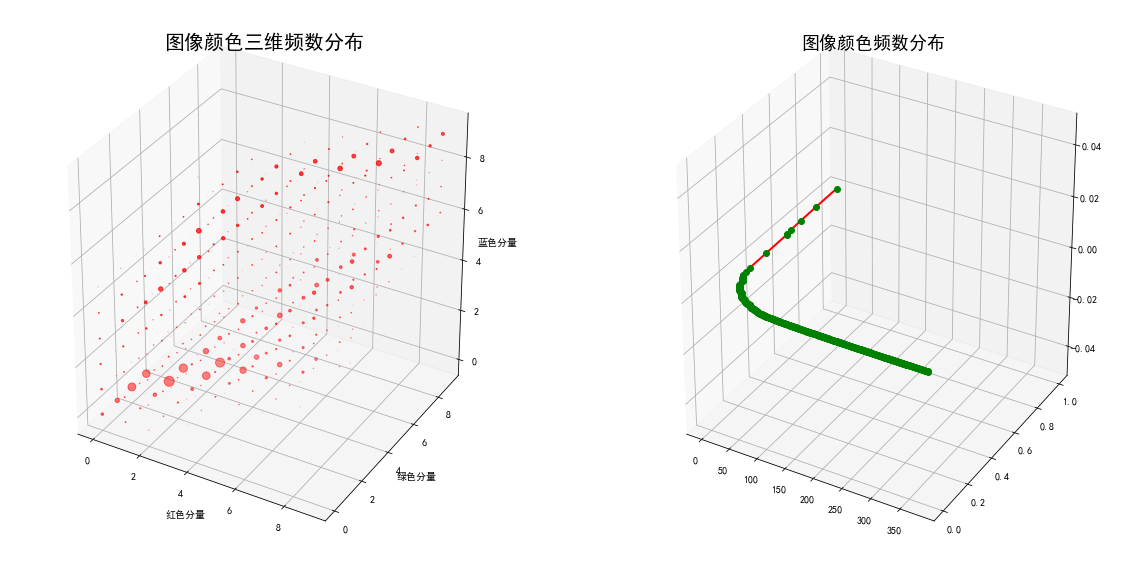

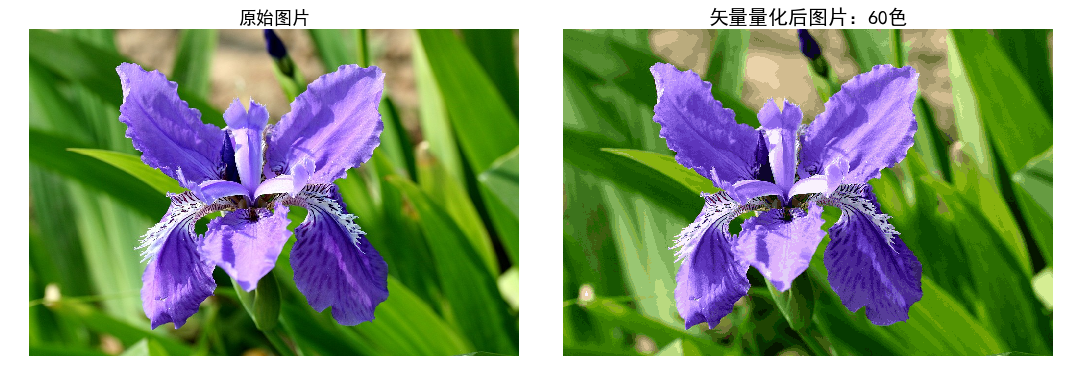

In [3]:
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
def restore_image(cb, cluster, shape):
    row, col, dummy = shape
    image = np.empty((row, col, 3))
    index = 0
    for r in range(row):
        for c in range(col):
            image[r, c] = cb[cluster[index]]
            index += 1
    return image

def show_scatter(a):
    N = 10
    density, edges = np.histogramdd(a, bins=[N,N,N], range=[(0,1), (0,1), (0,1)])
    density /= density.max()
    x = y = z = np.arange(N)
    d = np.meshgrid(x, y, z)

    fig = plt.figure(figsize=(20,10), facecolor='w')
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(d[1], d[0], d[2], c='r', s=100*density, marker='o', depthshade=True)
    ax.set_xlabel(u'红色分量')
    ax.set_ylabel(u'绿色分量')
    ax.set_zlabel(u'蓝色分量')
    plt.title(u'图像颜色三维频数分布', fontsize=20)

    ax = fig.add_subplot(122, projection='3d')
    den = density[density > 0]
    den = np.sort(den)[::-1]
    t = np.arange(len(den))
    ax.plot(t, den, 'r-', t, den, 'go', lw=2)
    plt.title(u'图像颜色频数分布', fontsize=18)
    plt.grid(True)

matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

num_vq = 60
im = Image.open('data/flower2.png')     # son.bmp(100)/flower2.png(200)/son.png(60)/lena.png(50)
image = np.array(im).astype(np.float) / 255
image = image[:, :, :3]
image_v = image.reshape((-1, 3))
model = KMeans(num_vq)
show_scatter(image_v)

N = image_v.shape[0]    # 图像像素总数
# 选择足够多的样本(如1000个)，计算聚类中心
idx = np.random.randint(0, N, size=1000)
image_sample = image_v[idx]
model.fit(image_sample)
c = model.predict(image_v)  # 聚类结果

plt.figure(figsize=(15, 8), facecolor='w')
plt.subplot(121)
plt.axis('off')
plt.title(u'原始图片', fontsize=18)
plt.imshow(image)

plt.subplot(122)
vq_image = restore_image(model.cluster_centers_, c, image.shape)
plt.axis('off')
plt.title(u'矢量量化后图片：%d色' % num_vq, fontsize=20)
plt.imshow(vq_image)

plt.tight_layout(1.2)

# 4.密度聚类方法
密度聚类方法的指导思想是，只要样本点的密度大于某阀值，则将该样本添加到最近的簇中。这类算法能克服基于距离的算法只能发现"类圆形"的聚类的缺点，可发现任意形状的聚类，且对噪声数据不敏感。但计算密度单元的计算复杂度大，需要建立空间索引来降低计算量

## 4.1.DBSCAN算法
Density-Based Spatial Clustering of Applications with Noise.一个比较有代表性的基于密度的聚类算法。与划分和层次聚类方法不同，它将簇定义为密度相连的点的最大集合，能够把具有足够高密度的区域划分为簇，并可在有“噪声” 的数据中发现任意形状的聚类

### 4.1.1.基本概念
- 对象的$\epsilon$-邻域:给定对象在半径$\epsilon$内的区域
- 核心对象:对于给定的数目m，如果一个对象的$\epsilon$-邻域至少包含m个对象，则称该对象为核心对象。
- 直接密度可达:给定一个对象集合D，如果p是在q的$\epsilon$-邻域内，而q是一个核心对象，我们说对象p从对象q出发是直接密度可达的。
- 密度可达:如果存在一个对象链$p_1,p_2,...,p_n,p_1=q,p_n=p$，对$p_i \in D, 1 \leq i \leq n$,$p_{i+1}$是从$p_i$关于$\epsilon$和m直接密度可达的，则对象p是从对象q关于$\epsilon$和m密度可达的。
- 密度相连:如果对象集合D中存在一个对象o，使得对象p和q是从o关于$\epsilon$和m密度可达的，那么对象p和q是关于$\epsilon$和m密度 相连的。
- 簇:一个基于密度的簇是最大的密度相连对象的集合。
- 噪声:不包含在任何簇中的对象称为噪声。

![images](images/01_09_001.png)<br/>
如图$\epsilon$=1cm，m=5，q是一个核心对象，从对象q出发到对象p是直接密度可达的<br/>
![images](images/01_09_002.png)<br/>

### 4.1.2.算法流程
- 如果一个点p的$\epsilon$-邻域包含多于m个对象，则创建一个p作为核心对象的新簇;
- 寻找并合并核心对象直接密度可达的对象
- 没有新点可以更新簇时，算法结束

由这个算法可以知道
- 每个簇至少包含一个核心对象;
- 非核心对象可以是簇的一部分，构成了簇的边缘(edge);
- 包含过少对象的簇被认为是噪声

## 4.2.密度最大值算法
密度最大值聚类是一种简洁优美的聚类算法, 可以识别各种形状的类簇, 并且参数很容易确定

### 4.2.1.局部密度
$$\rho_i=\sum_j\chi(d_{ij}-d_c)$$
其中
$$\chi(x)=\begin{cases}
1 & x < 0\\\\
0 & otherwise
\end{cases}$$
$d_c$是一个截断距离,$\rho_i$即到对象i的距离小于$d_c$的对象的个数。由于该算法只对$\rho_i$的相对值敏感, 所以对$d_c$的选择是稳健的，一种推荐做法是选择$d_c$，使得平均每个点的邻 居数为所有点的1%-2%。局部密度有三种定义方式
- 截断值：
$$\rho_i=\sum_j\chi(d_{ij}-d_c)$$
其中$\chi(x)=\begin{cases}
1 & x < 0\\\\
0 & otherwise
\end{cases}$
- 高斯核相似度:
$$\rho_i=\sum_{j \in I_S}e^{-(\frac{d_{ij}}{d_c})^2}$$
- K近邻均值:
$$\rho_i=\frac{1}{K}\sum_{i=1}^Kd_{ij}$$
其中$d_{i1}>d_{i2}>...>d_{iK}>d_{i,K+1}>...$

### 4.2.2.高局部密度点距离$\delta_i$
高局部密度点距离$\delta_i=min_{j:\rho_j>\rho_i}(d_{ij})$
- 在密度高于对象i的所有对象中，到对象i最近 的距离，即高局部密度点距离
- 对于密度最大的对象，设置$\delta_i=max(d_{ij})$，即该问题中的无穷大。只有那些密度是局部或者全局最大的点才会有远大于正常值的高局部密度点距离

首先找到一个样本，然后计算$\rho_i$，接着计算其它样本的$\rho$，找到那些$\rho > \rho_i$的样本点，然后计算找到的这些点与初始化样本的距离，然后找到一个这些距离中的最小的那一个距离。比如每个人的财富值是$\rho$，那么我们就是要找到比我财富大的离我最近的那个人。但是这里有个问题，比如马云，他的$\delta$是没有的，因为没有人比他的财富更多，这个就是密度最大的对象

### 4.2.3.簇中心的识别
$\rho$很大，说明这个点周围有好多好多样本。$\delta$很大，说明密度比这个点的那个点，离这个点很远很远.如果$\rho$很小，$\delta$很大，说明这个点是噪声，因为说明这个点离那个比他密度大的点很远，可是它周围的点又很少，那它肯定是噪声
- 那些有着比较大的局部密度$\rho_i$和很大的高密 距离$\delta_i$的点被认为是簇的中心;
- 高密距离$\delta_i$较大但局部密度$\rho_i$较小的点是异常点;
- 确定簇中心之后，其他点按照距离已知簇的中心最近进行分类.也可按照密度可达的方法进行分类

### 4.2.4.决策图Decision Graph
![images](images/01_09_003.png)

左图是所有点在二维空间的分布, 右图是以$\rho$为横坐标, 以$\delta$为纵坐标绘制的决策图。可以看到，1和10 两个点的$\rho_i$和$\delta_i$都比较大，作为簇的中心点。26、 27、28三个点的$\delta_i$也比较大，但是$\rho_i$较小，所以是异常点，也就是噪声

### 4.2.5.边界和噪声的重认识
- 在聚类分析中，通常需要确定每个点划分给某个簇的可靠性
- 在该算法中，可以首先为每个簇定义一个边界区域 (border region)，亦即划分给该簇但是距离其他簇的点的距离小于$d_c$的点的集合。然后为每个簇找到其边界区域的局部密度最大的点，令其局部密度为$\rho_h$
- 该簇中所有局部密度大于$\rho_h$的点被认为是簇核心的一部分(亦即将该点划分给该类簇的可靠性很大)，其余的点被认为是该类簇的光晕(halo)，亦即可以认为是噪声

## 4.3.MeanShift算法
MeanShift又被称为均值漂移聚类，目的就是找出最密集的区域。同样也是一个迭代过程。在聚类过程中，首先算出初始中心点的偏移均值，将该点移动到此偏移均值，然后以此为新的起始点，继续移动，直到满足最终的条件。Mean Shift 也引入了核函数，用于改善聚类效果。除此之外，Mean Shift 在图像分割，视频跟踪等领域也有较好的应用

# 5.谱聚类
## 5.1.谱
方阵的谱：方阵作为线性算子，它的所有特征值的全体。
- 方阵的谱半径为最大的特征值
- 矩阵A的谱半径:$A^TA$的最大特征值

谱聚类是一种基于图论的聚类方法，通过对样本数据的拉普拉斯矩阵的特征向量进行聚类，从而达到对样本数据聚类的目的

## 5.2.谱分析的整体过程
1. 给定一组数据$x_1,x_2,...,x_n$，记任意两个点之间的相似度("距离”的减函数)为$s_{ij}=<x_i,x_j>$， 形成相似度图(similarity graph):G=(V,E) 。 如果$x_i$和$x_j$之间的相似度$s_{ij}$大于一定的阈值，那么两个点是连接的，权值记做$s_{ij}$。
2. 接下来，可以用相似度图来解决样本数据的聚类问题:找到图的一个划分，形成若干个组(Group)，使得不同组之间有较低的权值，组内有较高的权值

## 5.3.邻接矩阵
给定一组样本$x_1,x_2,...,x_n$，那么对于样本$x_i,x_j$来度量它们的相似度$\omega_{ij}$，根据高斯相似度，可以得到
$$\omega_{ij}=e^{-\frac{||x_i-x_j||\_2^2}{2\sigma^2}}$$
根据这个公式，我们可以求任意两个样本的高斯相似度，从而得到了一个$n*n$的矩阵，其中对角线为1，其余为$\omega_{ij}$，我们将对角线清零，可以得到邻接矩阵
$$W=\begin{cases}
0 & i = j\\\\
\omega_{ij} & i \neq j
\end{cases},i,j=1,2,...,n$$

## 5.4.度与拉普拉斯矩阵
顶点的度$d_i=\sum_{j=1}^n\omega_{ij}$，所以这就是为什么需要将对角线清零。因为对角线清零后，顶点的度就是样本这一行的相似度加和.如果将邻接矩阵的对角线放置上各个顶点的度，其余清零，则得到了度矩阵D，它是一个对称阵，也是对角阵。拉普拉斯矩阵
$$L_{n\*n} = D_{n\*n} - W_{n\*n}$$

## 5.5.谱聚类算法
L是一个$n*n$的矩阵，n是样本个数，拉普拉斯矩阵是一个实数形成的对称矩阵，那么总可以求出它的特征值与特征向量，
使得等式成立
$$L \bullet \overrightarrow{\mu_i}=\lambda_i \bullet \overrightarrow{\mu_i}$$
由于L是一个半正定矩阵，所以特征值$\lambda$最小是0，剩下的都是正数，那么我们就可以有如下描述：
> 假设$\lambda_1,\lambda_2,...,\lambda_n$是拉普拉斯矩阵L的n个特征值，其中$\lambda_1=0$，剩下的$\lambda$是大于0的正数，同样有n个特征向量与之对应$\overrightarrow{\mu_1},\overrightarrow{\mu_2},...,\overrightarrow{\mu_n}$,其中每个$\overrightarrow{\mu_i}$都是一个列向量，那么这n个列向量可以组成一个$n*n$的矩阵，如下：
$$\begin{bmatrix}
\mu_{11}&\mu_{12}&\dots&\mu_{1k}&\dots&\mu_{1n}\\\\
\mu_{21}&\mu_{22}&\dots&\mu_{2k}&\dots&\mu_{2n}\\\\
\vdots&\vdots&\vdots&\vdots&\vdots&\vdots\\\\
\mu_{n1}&\mu_{n2}&\dots&\mu_{nk}&\dots&\mu_{nn}\\\\
\end{bmatrix}$$
假设我们需要将原始样本分为K个簇，那么我们只保留上述矩阵的前K个列，后面的$n-K$个列舍弃，那么第一行的k个值就是样本1的特征，第二行就是样本2的特征，...,第n行就是第n个样本的特征，然后做K-Means聚类就可以了

## 5.2.谱分析的整体过程
1. 给定一组数据$x_1,x_2,...,x_n$，记任意两个点之间的相似度("距离”的减函数)为$s_{ij}=<x_i,x_j>$， 形成相似度图(similarity graph):G=(V,E) 。 如果$x_i$和$x_j$之间的相似度$s_{ij}$大于一定的阈值，那么两个点是连接的，权值记做$s_{ij}$。
2. 接下来，可以用相似度图来解决样本数据的聚类问题:找到图的一个划分，形成若干个组(Group)，使得不同组之间有较低的权值，组内有较高的权值

开始谱聚类...


谱聚类完成...


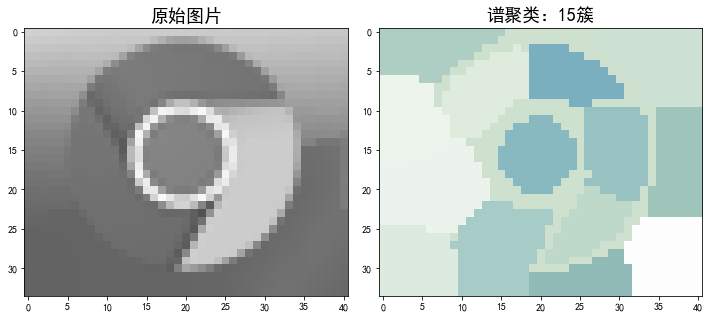

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.cluster import spectral_clustering
from sklearn.feature_extraction import image
from PIL import Image
%matplotlib inline
matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

pic = Image.open('data/Chrome.png')
pic = pic.convert('L')
data = np.array(pic).astype(np.float) / 255

plt.figure(figsize=(10, 5), facecolor='w')
plt.subplot(121)
plt.imshow(pic, cmap=plt.cm.gray, interpolation='nearest')
plt.title(u'原始图片', fontsize=18)
n_clusters = 15

affinity = image.img_to_graph(data)
beta = 3
affinity.data = np.exp(-beta * affinity.data / affinity.data.std()) + 10e-5
# a = affinity.toarray()
# b = np.diag(a.diagonal())
# a -= b
print('开始谱聚类...')
y = spectral_clustering(affinity, n_clusters=n_clusters, assign_labels='kmeans', random_state=1)
print('谱聚类完成...')
y = y.reshape(data.shape)
for n in range(n_clusters):
    data[y == n] = n
plt.subplot(122)
clrs = []
for c in np.linspace(16776960, 16711935, n_clusters):
    clrs.append('#%06d' % c)
cm = matplotlib.colors.ListedColormap(clrs)
plt.imshow(data, cmap=cm, interpolation='nearest')
plt.title(u'谱聚类：%d簇' % n_clusters, fontsize=18)
plt.tight_layout()

# 6.AP聚类
AP(Affinity Propagation)算法是一种基于近邻传播的半监督聚类算法。